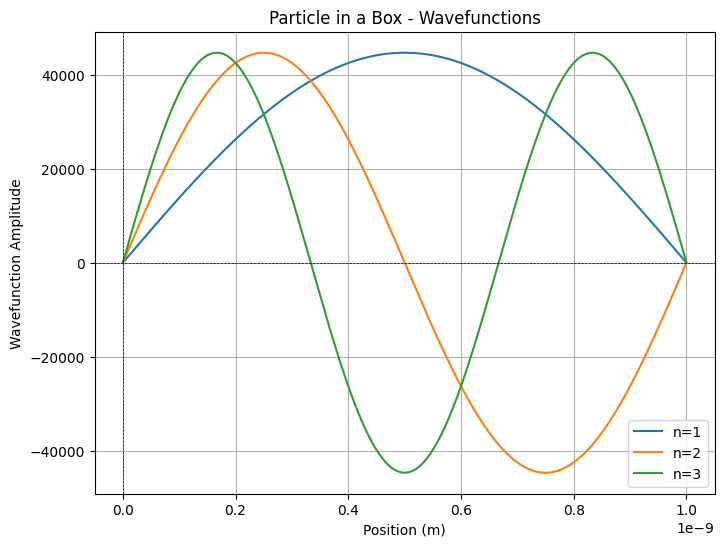

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, eV

def particle_in_a_box(n, L, m):
    """
    Calculates the wavefunction for a particle in a box.

    Parameters:
    - n: quantum number (positive integer)
    - L: length of the box
    - m: mass of the particle

    Returns:
    - x: array of position values
    - psi: array of wavefunction values
    """
    x = np.linspace(0, L, 1000)
    psi = np.sqrt(2 / L) * np.sin(n * np.pi * x / L)
    return x, psi

def plot_particle_in_a_box(n_values, L, m):
    """
    Plots the wavefunctions for a particle in a box for given quantum numbers.

    Parameters:
    - n_values: list of quantum numbers
    - L: length of the box
    - m: mass of the particle
    """
    plt.figure(figsize=(8, 6))
    for n in n_values:
        x, psi = particle_in_a_box(n, L, m)
        plt.plot(x, psi, label=f'n={n}')

    plt.title('Particle in a Box - Wavefunctions')
    plt.xlabel('Position (m)')
    plt.ylabel('Wavefunction Amplitude')
    plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
    plt.axvline(0, color='black', linewidth=0.5, linestyle='--')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage
n_values = [1, 2, 3]  # Quantum numbers
box_length = 1e-9  # Length of the box in meters
electron_mass = 9.10938356e-31  # Mass of an electron in kg

plot_particle_in_a_box(n_values, box_length, electron_mass)


In [31]:
from sympy import symbols, Matrix, integrate, sqrt, sin, I, pi

# Define symbols
x, L = symbols('x L')
n = symbols('n', integer=True, positive=True)

# Define the Hilbert space basis functions for a particle in a box
def psi_n(n, L):
    return sqrt(2 / L) * sin(n * pi * x / L)

# Calculate the inner product of two basis functions
def inner_product(psi1, psi2, L):
    return integrate(psi1.conjugate() * psi2, (x, 0, L))

# Define the Hilbert space matrix for a particle in a box
def hilbert_space_matrix(N, L):
    basis_functions = [psi_n(i, L) for i in range(1, N + 1)]
    matrix_elements = [[inner_product(phi_i, phi_j, L) for phi_j in basis_functions] for phi_i in basis_functions]
    return Matrix(matrix_elements)

# Example usage
box_length = 1  # Length of the box
number_of_states = 3  # Number of states in the Hilbert space

hilbert_matrix = hilbert_space_matrix(number_of_states, box_length)

# Display the Hilbert space matrix
print("Hilbert Space Matrix:")
print(hilbert_matrix)


Hilbert Space Matrix:
Matrix([[1.00000000000000, 0, 0], [0, 1.00000000000000, 0], [0, 0, 1.00000000000000]])


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
m= 1
hbar= 1
a= 1
N= 1000
x= np.linspace(0, a, N+1)
dx= x[1] - x[0]
M= np.diag(-2*np.ones(N-1)) +np.diag(np.ones(N-2), 1) +np.diag(np.ones(N-2), -1)
print(M)
print(M.shape)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]
(999, 999)


In [23]:
k= -hbar**2/(2*m*dx**2)
H= k*M
E, psi_T= np.linalg.eigh(H)
print(E[0])

4.934798141963842


Text(0, 0.5, 'psi')

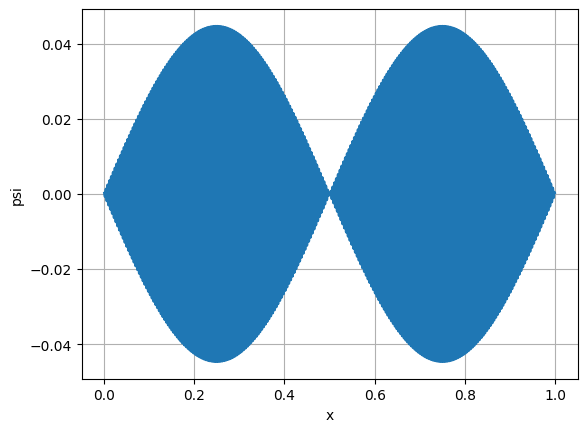

In [26]:
#print(psi_T[0])
xp= np.linspace(dx, a-dx, N-1)
#print(xp)
plt.plot(xp, psi_T[1])
plt.grid()
plt.xlabel('x')
plt.ylabel('psi')

Text(0, 0.5, 'psi*psi')

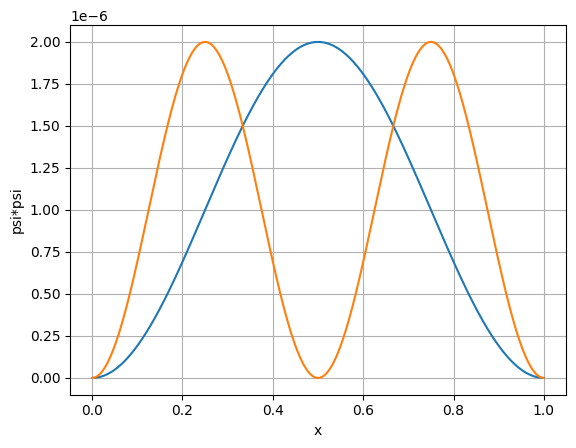

In [32]:
psi2= psi_T[1]
I= np.sum(psi2**2)*dx
A=np.sqrt(I)
psi2= A*psi2
psi1= psi_T[0]
I= np.sum(psi1**2)*dx
A=np.sqrt(I)
psi1= A*psi1
plt.plot(xp, psi1**2)
plt.plot(xp, psi2**2)
plt.grid()
plt.xlabel('x')
plt.ylabel('psi*psi')

In [35]:
a= 1
b= 2
N= 10
x= np.linspace(0, a, N+1)
y= np.linspace(0, b, N+1)
print(x)
print(y)
X, Y= np.meshgrid(x, y)
print(X)
print(Y)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2. ]
[[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
 [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]]
[[0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2 0.2]
 [0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4 0.4]
 [0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6 0.6]
 [0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8 0.8]
 [1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. ]
 [1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2 1.2]
 [1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4 1.4]
 [1.6 1.6 1.6 

Text(0, 0.5, 'y')

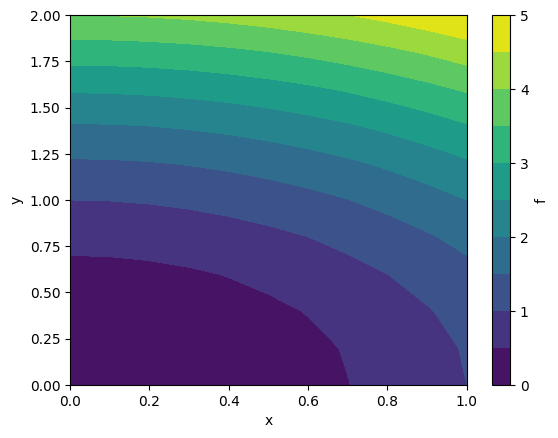

In [43]:
f=np.sin(4*X)*np.sin(Y)
plt.contourf(X, Y, X**2 + Y**2, levels=10)
plt.colorbar(label='f')
plt.xlabel('x')
plt.ylabel('y')

In [48]:
hbar= 1
m= 1
a= 1
b= 1.5
B=np.sqrt(4/(a*b))
def Ex(nxt):
    return (nxt**2*np.pi**2*hbar**2/(2*m*a**2))
def Ey(nyt):
    return (nyt**2*np.pi**2*hbar**2/(2*m*b**2))
def E(nxt, nyt):
    return(Ex(nxt)+Ey(nyt))
print(E(1, 1))
print(E(1, 2))
print(E(2, 1))

9.869604401089358
24.674011002723397
24.674011002723397


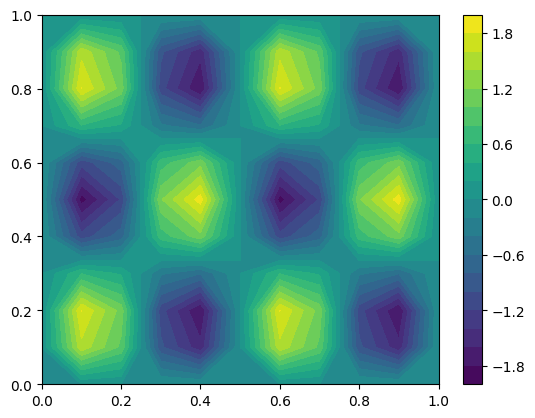

In [61]:
N=10
x= np.linspace(0, a, N+1)
y= np.linspace(0, b, N+1)
X, Y= np.meshgrid(x, y)
def psi(nxt, nyt):
    return(B*np.sin(nxt*np.pi*X/a)*np.sin(nyt*np.pi*Y/b))
plt.contourf(X, Y, psi(4, 3), levels=20)
plt.colorbar()